#### G.Sriram
#### CS22B2020

In this question, you will implement the Minimum Spanning Tree (MST) approach to cluster the Iris dataset using only the sepal length and sepal width features. Your task is to write a Python program that performs the following<br> steps:<br>
Load the Iris dataset.<br>
Extract the sepal length and sepal width columns.<br>
Calculate the pairwise Euclidean distances between data points using the selected features.<br>
Build the Minimum Spanning Tree using Prim's/Kruskal’s algorithm.<br>
Identify the two longest edges in the MST and remove them to create three clusters.<br>
Visualize the Minimum Spanning Tree with identified clusters.<br>


In [1]:
import pandas as pd
import numpy as np

In [2]:
iris_df = pd.read_csv('iris.csv')
iris_df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [3]:
sepal_length = iris_df['sepal.length']
sepal_width =iris_df['sepal.width']

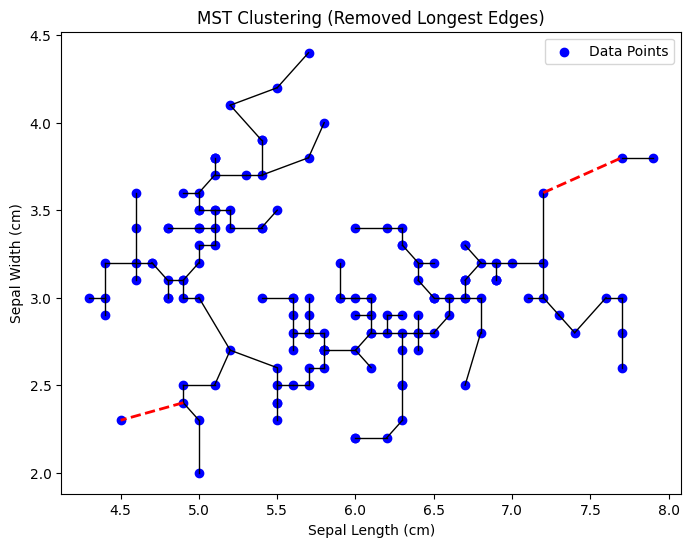

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def euclidean_distance(point1, point2):

    point1 = np.array(point1)
    point2 = np.array(point2)
    
 
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Create the distance matrix between all points in the dataset
def create_distance_matrix(df):
    n = len(df)  # Number of points
    distance_matrix = np.zeros((n, n))  # Initialize an n x n matrix with 0s

    # Fill the distance matrix
    for i in range(n):
        for j in range(n):
            if i != j:  # We don't need to calculate distance from a point to itself
                point1 = [df['sepal.length'].iloc[i], df['sepal.width'].iloc[i]]  # Updated column names
                point2 = [df['sepal.length'].iloc[j], df['sepal.width'].iloc[j]]  # Updated column names
                distance_matrix[i][j] = euclidean_distance(point1, point2)

    return distance_matrix

# Prim's algorithm to build the Minimum Spanning Tree (MST)
def prim_mst(distance_matrix, num_points):
    selected_nodes = [0]  # Start with the first point (node 0)
    remaining_nodes = set(range(1, num_points))  # All other nodes
    mst_edges = []  # To store MST edges

    # Keep adding edges to the MST until all nodes are included
    while remaining_nodes:
        min_edge = None
        min_weight = float('inf')  # Start with a large number

        # Check for minimum weight edge from selected nodes to remaining nodes
        for u in selected_nodes:
            for v in remaining_nodes:
                if distance_matrix[u][v] < min_weight:
                    min_weight = distance_matrix[u][v]
                    min_edge = (u, v, min_weight)

        # Add the found edge to the MST
        if min_edge:
            u, v, w = min_edge
            mst_edges.append((u, v, w))
            selected_nodes.append(v)
            remaining_nodes.remove(v)

    return mst_edges

# Plot MST and create clusters by removing longest edges
def plot_clusters(mst_edges, df):
    # Sort the edges by their weight and remove the two longest edges
    mst_edges = sorted(mst_edges, key=lambda x: x[2], reverse=True)
    removed_edges = mst_edges[:2]  # The two longest edges
    mst_edges = mst_edges[2:]  # Remaining edges after removing two longest

    # Plot the dataset points
    plt.figure(figsize=(8, 6))
    plt.scatter(df['sepal.length'], df['sepal.width'], color='blue', label='Data Points')

    # Plot edges in the MST (remaining edges)
    for u, v, w in mst_edges:
        point1 = df.iloc[u]
        point2 = df.iloc[v]
        plt.plot([point1['sepal.length'], point2['sepal.length']],
                 [point1['sepal.width'], point2['sepal.width']], 'k-', lw=1)

    # Plot the removed longest edges in red
    for u, v, w in removed_edges:
        point1 = df.iloc[u]
        point2 = df.iloc[v]
        plt.plot([point1['sepal.length'], point2['sepal.length']],
                 [point1['sepal.width'], point2['sepal.width']], 'r--', lw=2)

    plt.title("MST Clustering (Removed Longest Edges)")
    plt.xlabel("Sepal Length (cm)")
    plt.ylabel("Sepal Width (cm)")
    plt.legend()
    plt.show()

iris_df = pd.read_csv('iris.csv') 
temp_df = iris_df.drop(columns=['variety'])  


distance_matrix = create_distance_matrix(temp_df)


num_points = temp_df.shape[0]  
mst_edges = prim_mst(distance_matrix, num_points)


plot_clusters(mst_edges, temp_df)


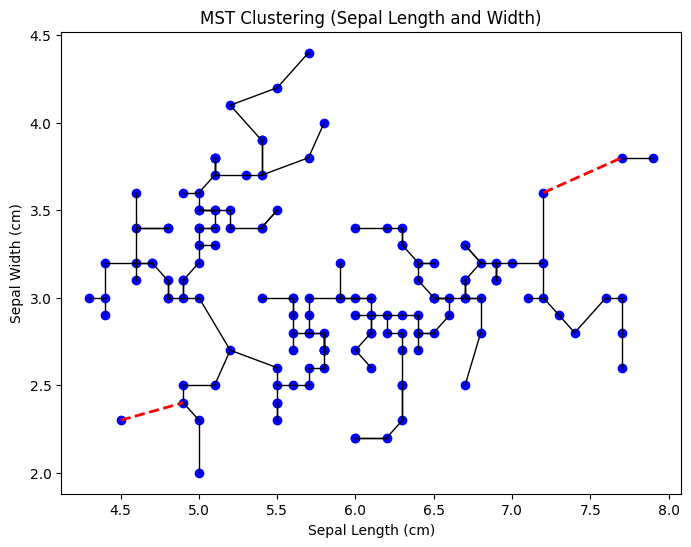

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.sparse.csgraph import minimum_spanning_tree

# Load the Iris dataset and extract sepal length and sepal width
iris_df = pd.read_csv('iris.csv')
temp_df = iris_df[['sepal.length', 'sepal.width']]

# Calculate the pairwise Euclidean distance matrix
distance_matrix = squareform(pdist(temp_df, metric='euclidean'))

# Build the Minimum Spanning Tree (MST) using Kruskal's algorithm
mst = minimum_spanning_tree(distance_matrix).toarray()

# Extract edges from the MST
edges = [(i, j, mst[i, j]) for i in range(len(mst)) for j in range(len(mst)) if mst[i, j] > 0]

# Sort edges by weight and remove the two longest edges
edges = sorted(edges, key=lambda x: x[2], reverse=True)
longest_edges = edges[:2]
remaining_edges = edges[2:]

# Plot the MST and clusters
plt.figure(figsize=(8, 6))
plt.scatter(temp_df['sepal.length'], temp_df['sepal.width'], color='blue')

# Plot remaining MST edges
for u, v, w in remaining_edges:
    plt.plot([temp_df.iloc[int(u), 0], temp_df.iloc[int(v), 0]],
             [temp_df.iloc[int(u), 1], temp_df.iloc[int(v), 1]], 'k-', lw=1)

# Plot the two longest edges in red (removed)
for u, v, w in longest_edges:
    plt.plot([temp_df.iloc[int(u), 0], temp_df.iloc[int(v), 0]],
             [temp_df.iloc[int(u), 1], temp_df.iloc[int(v), 1]], 'r--', lw=2)

plt.title("MST Clustering (Sepal Length and Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()
